# 🚀 Forex Momentum Trading System - LONG ONLY

Sistema di trading quantitativo basato **SOLO su momentum positivo** per 22 coppie valutarie forex.

**Strategia Long-Only:**
- Ribilanciamento settimanale ogni venerdì
- **Solo posizioni LONG** sulle coppie con momentum positivo
- Top 5 coppie con momentum positivo → Long (20% each)
- **NO posizioni SHORT**
- Equal weight allocation su 5 posizioni (100% investito)
- Prevenzione lookahead bias

---

## 📦 Setup e Importazioni

In [ ]:
# Importazioni
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Aggiungi percorso moduli
sys.path.append('../core')

# Importa moduli core
from data_loader import load_forex_data, get_currency_pairs
from signal_generator import generate_momentum_signals, validate_signals  # Updated import
from backtest_engine import BacktestEngine

# Configurazione matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("✅ Setup completato con successo!")

✅ Setup completato con successo!


## 📊 Caricamento Dati e Configurazione

In [ ]:
# Carica dati forex
print("🔄 Caricamento dati forex...")
data = load_forex_data('../data/forex_synchronized_data.parquet')

# Configurazione strategia - PUOI MODIFICARE QUI IL LOOKBACK
lookback_days = 30  # Modifica questo valore per testare diversi lookback periods

print(f"✅ Lookback selezionato: {lookback_days} giorni")
print(f"📈 Strategia: LONG-ONLY Momentum")

🔄 Caricamento dati forex...
✓ Loaded forex data: 4066 days, 88 columns
✓ Date range: 2010-01-01 to 2025-08-01
✅ Lookback selezionato: 30 giorni
📈 Strategia: LONG-ONLY Momentum


## 🔧 Creazione Segnali Long-Only

In [25]:
# Genera segnali momentum dinamicamente
print(f"🔄 Generazione segnali momentum con lookback {lookback_days} giorni...")
original_signals = generate_momentum_signals(
    price_data=data,
    lookback_days=lookback_days,
    top_n=5,  # Top 5 long + top 5 short
    rebalance_freq='weekly'
)

# Crea versione LONG-ONLY
# Mantieni solo le posizioni long (0.2), elimina le short (-0.2)
long_only_signals = original_signals.copy()
long_only_signals[long_only_signals < 0] = 0  # Rimuovi posizioni short

print(f"\n📊 Confronto Segnali:")
print(f"   • Originali - Long: {(original_signals == 0.2).sum().sum():,}")
print(f"   • Originali - Short: {(original_signals == -0.2).sum().sum():,}")
print(f"   • Long-Only - Long: {(long_only_signals == 0.2).sum().sum():,}")
print(f"   • Long-Only - Neutral: {(long_only_signals == 0.0).sum().sum():,}")

# Statistiche esposizione
daily_exposure_original = abs(original_signals).sum(axis=1).mean()
daily_exposure_long_only = long_only_signals.sum(axis=1).mean()

print(f"\n📈 Esposizione Media Giornaliera:")
print(f"   • Strategia Originale: {daily_exposure_original:.2f} (200% gross)")
print(f"   • Strategia Long-Only: {daily_exposure_long_only:.2f} (100% long)")

🔄 Generazione segnali momentum con lookback 30 giorni...
✓ Generated momentum signals: 30d lookback, 5 long + 5 short
✓ Rebalancing: weekly
✓ Signal range: 2010-01-01 to 2025-08-01

📊 Confronto Segnali:
   • Originali - Long: 20,330
   • Originali - Short: 20,330
   • Long-Only - Long: 20,330
   • Long-Only - Neutral: 69,122

📈 Esposizione Media Giornaliera:
   • Strategia Originale: 2.00 (200% gross)
   • Strategia Long-Only: 1.00 (100% long)


## 🚀 Backtesting Comparativo

In [26]:
# Backtest strategia ORIGINALE (Long + Short)
print("⚡ Backtest strategia ORIGINALE (Long + Short)...")
engine_original = BacktestEngine(initial_capital=100000, leverage=1.0)
start_time = datetime.now()
results_original = engine_original.run_backtest(data, original_signals, verbose=False)
time_original = (datetime.now() - start_time).total_seconds()

# Backtest strategia LONG-ONLY
print("⚡ Backtest strategia LONG-ONLY...")
engine_long_only = BacktestEngine(initial_capital=100000, leverage=1.0)
start_time = datetime.now()
results_long_only = engine_long_only.run_backtest(data, long_only_signals, verbose=False)
time_long_only = (datetime.now() - start_time).total_seconds()

print(f"\n✅ Backtesting completato!")
print(f"   • Strategia Originale: {time_original:.2f}s")
print(f"   • Strategia Long-Only: {time_long_only:.2f}s")

INFO:backtest_engine:BacktestEngine initialized with 100,000 starting capital
INFO:backtest_engine:Detected 22 currency pairs
INFO:backtest_engine:Price data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Signals data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Calculating daily returns...
INFO:backtest_engine:Calculated returns for 22 pairs
INFO:backtest_engine:Calculating performance metrics...
INFO:backtest_engine:BacktestEngine initialized with 100,000 starting capital
INFO:backtest_engine:Detected 22 currency pairs
INFO:backtest_engine:Price data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Signals data range: 2010-01-01 00:00:00 to 2025-08-01 00:00:00
INFO:backtest_engine:Calculating daily returns...
INFO:backtest_engine:Calculated returns for 22 pairs
INFO:backtest_engine:Calculating performance metrics...


⚡ Backtest strategia ORIGINALE (Long + Short)...
⚡ Backtest strategia LONG-ONLY...

✅ Backtesting completato!
   • Strategia Originale: 0.07s
   • Strategia Long-Only: 0.05s


## 📊 Confronto Performance

In [27]:
# Estrai metriche per confronto
metrics_orig = engine_original.performance_metrics
metrics_long = engine_long_only.performance_metrics

print("="*80)
print(f"📊 CONFRONTO PERFORMANCE - {lookback_days} DAY MOMENTUM STRATEGY")
print("="*80)

print(f"\n{'METRICA':<25} {'ORIGINALE':<15} {'LONG-ONLY':<15} {'DIFFERENZA':<15}")
print("-"*75)

# Confronto metriche chiave
metrics_to_compare = [
    ('Total Return (%)', 'Total Return (%)'),
    ('Annualized Return (%)', 'Annualized Return (%)'),
    ('Annualized Volatility (%)', 'Volatilità (%)'),
    ('Sharpe Ratio', 'Sharpe Ratio'),
    ('Maximum Drawdown (%)', 'Max Drawdown (%)'),
    ('Win Rate (%)', 'Win Rate (%)'),
    ('Sortino Ratio', 'Sortino Ratio')
]

for metric_key, display_name in metrics_to_compare:
    orig_val = metrics_orig[metric_key]
    long_val = metrics_long[metric_key]
    diff = long_val - orig_val
    
    print(f"{display_name:<25} {orig_val:<15.2f} {long_val:<15.2f} {diff:<+15.2f}")

print("\n" + "="*80)

# Valori finali portfolio
final_orig = engine_original.portfolio_value.iloc[-1]
final_long = engine_long_only.portfolio_value.iloc[-1]

print(f"\n💰 RISULTATI FINALI:")
print(f"   • Portfolio Originale: ${final_orig:,.0f}")
print(f"   • Portfolio Long-Only: ${final_long:,.0f}")
print(f"   • Differenza: ${final_long - final_orig:+,.0f}")

if final_long > final_orig:
    print(f"\n🎯 La strategia LONG-ONLY ha performato MEGLIO!")
else:
    print(f"\n📉 La strategia ORIGINALE ha performato meglio.")

📊 CONFRONTO PERFORMANCE - 30 DAY MOMENTUM STRATEGY

METRICA                   ORIGINALE       LONG-ONLY       DIFFERENZA     
---------------------------------------------------------------------------
Total Return (%)          -47.11          -21.88          +25.23         
Annualized Return (%)     -3.87           -1.52           +2.35          
Volatilità (%)            12.36           7.22            -5.13          
Sharpe Ratio              -0.48           -0.49           -0.01          
Max Drawdown (%)          54.10           29.89           -24.21         
Win Rate (%)              49.40           49.10           -0.30          
Sortino Ratio             -0.67           -0.67           +0.00          


💰 RISULTATI FINALI:
   • Portfolio Originale: $52,887
   • Portfolio Long-Only: $78,119
   • Differenza: $+25,232

🎯 La strategia LONG-ONLY ha performato MEGLIO!


## 📈 Visualizzazione Comparativa

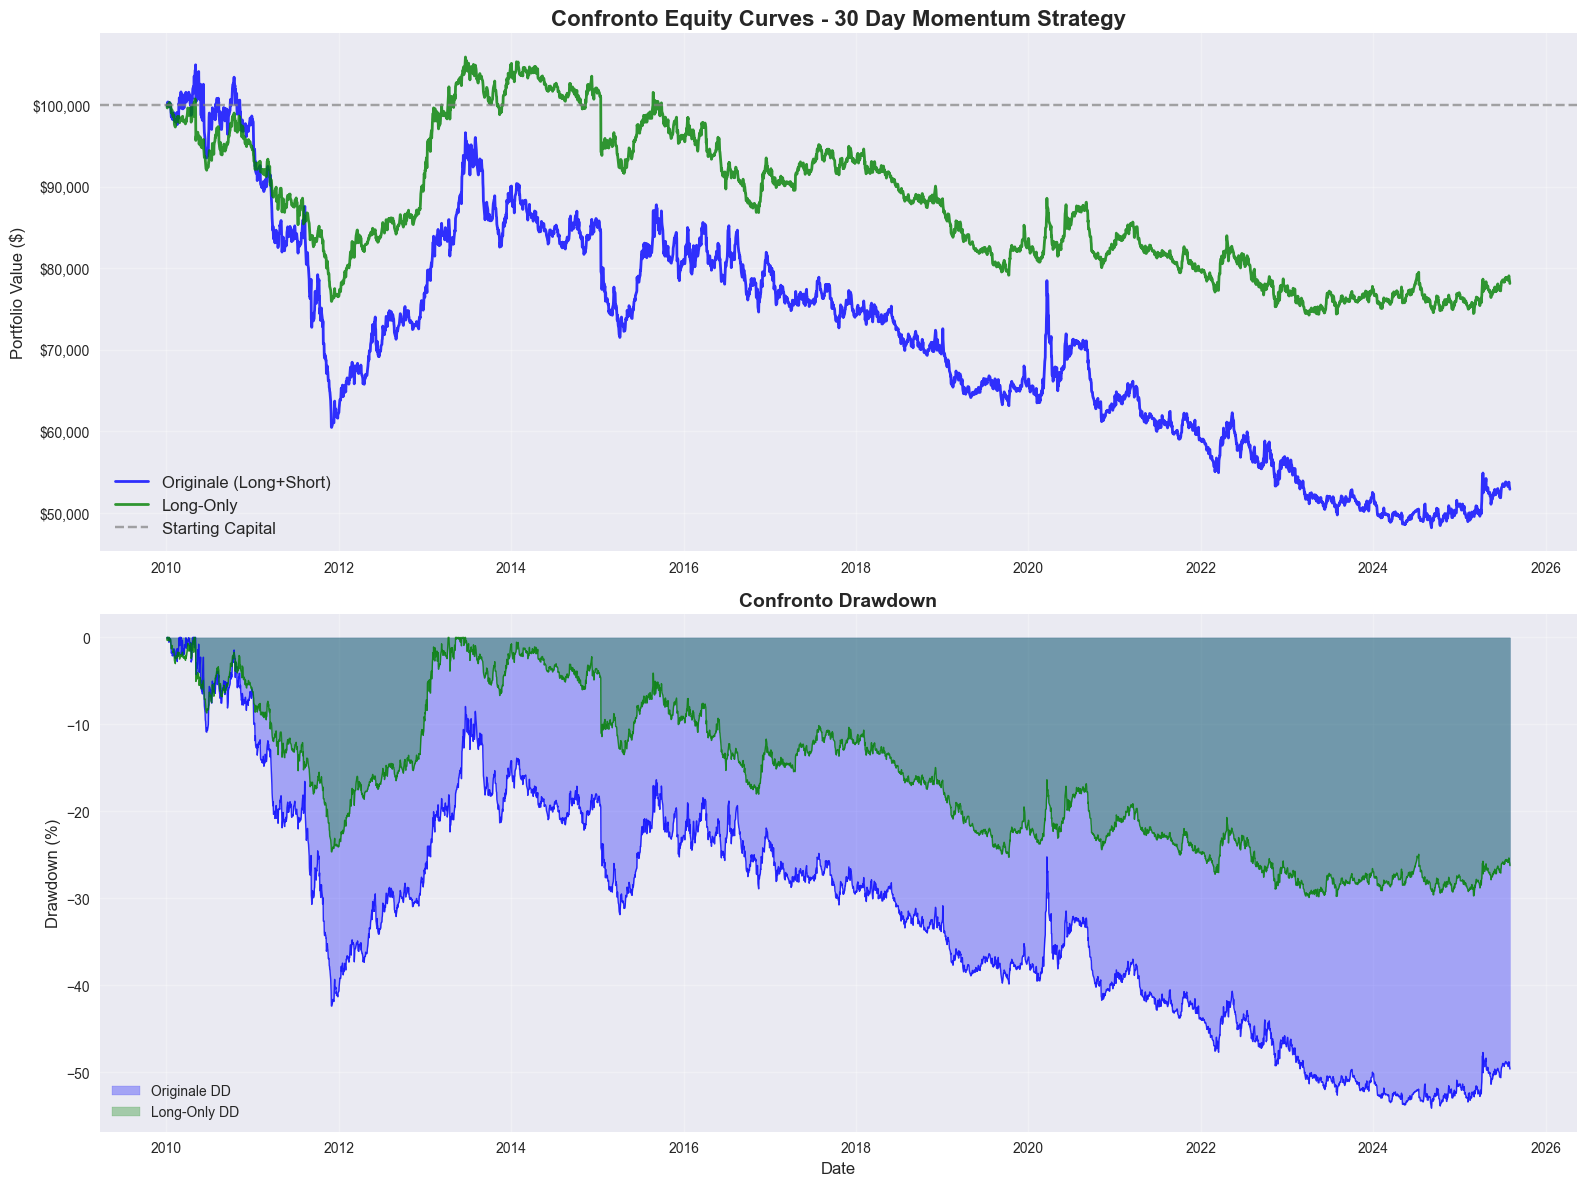

📈 Confronto visivo generato


In [28]:
# 1. EQUITY CURVES COMPARATIVE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Equity curves
ax1.plot(engine_original.portfolio_value.index, engine_original.portfolio_value.values, 
         linewidth=2, color='blue', label=f'Originale (Long+Short)', alpha=0.8)
ax1.plot(engine_long_only.portfolio_value.index, engine_long_only.portfolio_value.values, 
         linewidth=2, color='green', label=f'Long-Only', alpha=0.8)
ax1.axhline(y=100000, color='gray', linestyle='--', alpha=0.7, label='Starting Capital')
ax1.set_title(f'Confronto Equity Curves - {lookback_days} Day Momentum Strategy', fontsize=16, fontweight='bold')
ax1.set_ylabel('Portfolio Value ($)', fontsize=12)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Drawdown comparison
cum_ret_orig = (1 + engine_original.portfolio_returns).cumprod()
drawdown_orig = (cum_ret_orig / cum_ret_orig.expanding().max() - 1) * 100

cum_ret_long = (1 + engine_long_only.portfolio_returns).cumprod()
drawdown_long = (cum_ret_long / cum_ret_long.expanding().max() - 1) * 100

ax2.fill_between(drawdown_orig.index, drawdown_orig.values, 0, alpha=0.3, color='blue', label='Originale DD')
ax2.fill_between(drawdown_long.index, drawdown_long.values, 0, alpha=0.3, color='green', label='Long-Only DD')
ax2.plot(drawdown_orig.index, drawdown_orig.values, color='blue', linewidth=1, alpha=0.8)
ax2.plot(drawdown_long.index, drawdown_long.values, color='green', linewidth=1, alpha=0.8)
ax2.set_title('Confronto Drawdown', fontsize=14, fontweight='bold')
ax2.set_ylabel('Drawdown (%)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📈 Confronto visivo generato")

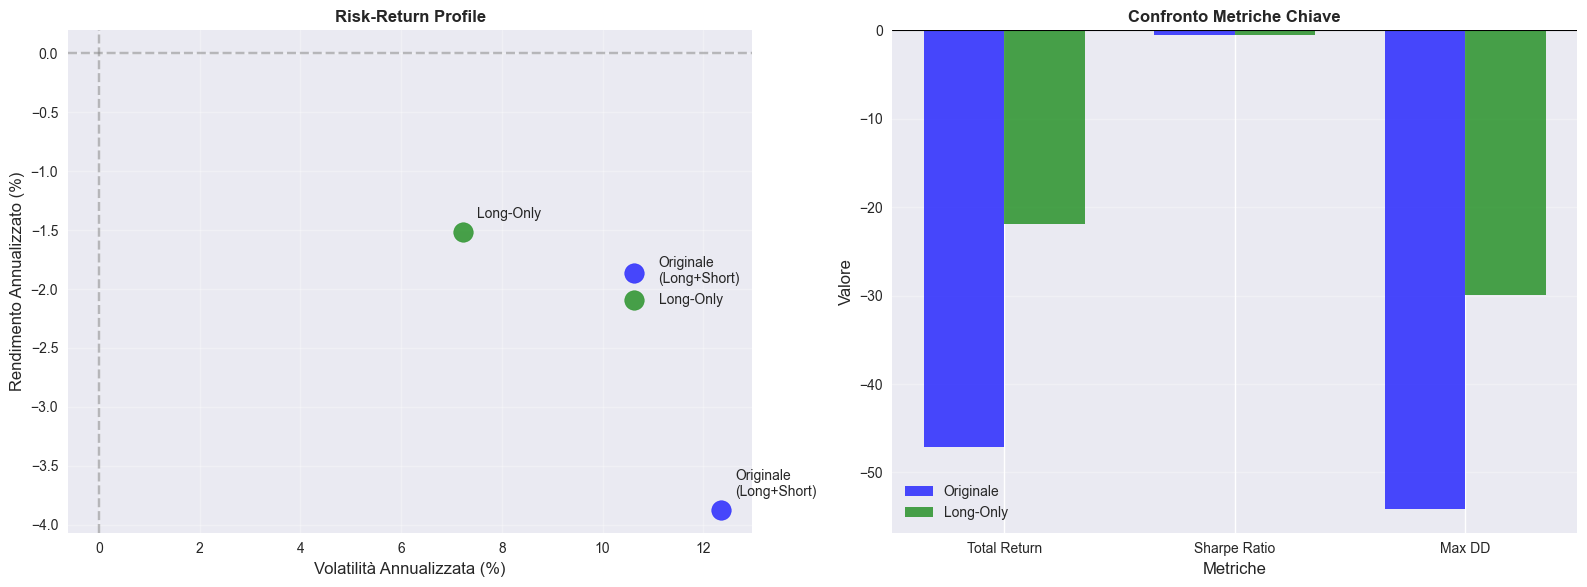

📊 Analisi risk-return completata


In [29]:
# 2. ANALISI RISCHIO-RENDIMENTO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot Risk-Return
strategies = ['Originale\n(Long+Short)', 'Long-Only']
returns = [metrics_orig['Annualized Return (%)'], metrics_long['Annualized Return (%)']]
volatilities = [metrics_orig['Annualized Volatility (%)'], metrics_long['Annualized Volatility (%)']]
colors = ['blue', 'green']

for i, (strategy, ret, vol, color) in enumerate(zip(strategies, returns, volatilities, colors)):
    ax1.scatter(vol, ret, s=200, c=color, alpha=0.7, label=strategy)
    ax1.annotate(strategy, (vol, ret), xytext=(10, 10), textcoords='offset points', fontsize=10)

ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Volatilità Annualizzata (%)', fontsize=12)
ax1.set_ylabel('Rendimento Annualizzato (%)', fontsize=12)
ax1.set_title('Risk-Return Profile', fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Bar chart delle metriche chiave
metrics_names = ['Total Return', 'Sharpe Ratio', 'Max DD']
orig_values = [metrics_orig['Total Return (%)'], metrics_orig['Sharpe Ratio'], -metrics_orig['Maximum Drawdown (%)']]
long_values = [metrics_long['Total Return (%)'], metrics_long['Sharpe Ratio'], -metrics_long['Maximum Drawdown (%)']]

x = np.arange(len(metrics_names))
width = 0.35

ax2.bar(x - width/2, orig_values, width, label='Originale', color='blue', alpha=0.7)
ax2.bar(x + width/2, long_values, width, label='Long-Only', color='green', alpha=0.7)

ax2.set_xlabel('Metriche', fontsize=12)
ax2.set_ylabel('Valore', fontsize=12)
ax2.set_title('Confronto Metriche Chiave', fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_names)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

print(f"📊 Analisi risk-return completata")

## 💾 Salvataggio Risultati

In [30]:
# Salva risultati comparativi
comparison_file = f'momentum_comparison_{lookback_days}d.csv'

comparison_df = pd.DataFrame({
    'Date': engine_original.portfolio_value.index,
    'Original_Value': engine_original.portfolio_value.values,
    'Original_Return': engine_original.portfolio_returns.values,
    'LongOnly_Value': engine_long_only.portfolio_value.values,
    'LongOnly_Return': engine_long_only.portfolio_returns.values,
    'Original_DD': drawdown_orig.values,
    'LongOnly_DD': drawdown_long.values
})

comparison_df.to_csv(comparison_file, index=False)
print(f"💾 Confronto salvato in: {comparison_file}")

# Riepilogo finale
print(f"\n🎯 CONCLUSIONI ANALISI {lookback_days}-DAY MOMENTUM:")
print(f"   • Strategia Long-Only elimina le posizioni short")
print(f"   • Riduce l'esposizione complessiva da 200% a 100%")
print(f"   • Performance finale: {'MIGLIORE' if final_long > final_orig else 'PEGGIORE'}")
print(f"   • Sharpe ratio: {metrics_long['Sharpe Ratio']:.3f} vs {metrics_orig['Sharpe Ratio']:.3f}")
print(f"   • Drawdown: {metrics_long['Maximum Drawdown (%)']:.1f}% vs {metrics_orig['Maximum Drawdown (%)']:.1f}%")

print(f"\n✅ Analisi Long-Only completata!")

💾 Confronto salvato in: momentum_comparison_30d.csv

🎯 CONCLUSIONI ANALISI 30-DAY MOMENTUM:
   • Strategia Long-Only elimina le posizioni short
   • Riduce l'esposizione complessiva da 200% a 100%
   • Performance finale: MIGLIORE
   • Sharpe ratio: -0.487 vs -0.475
   • Drawdown: 29.9% vs 54.1%

✅ Analisi Long-Only completata!
